***Andrew Plum***</br>
***CS 474***</br>
***9/1/2024***

### Homewoke 1: Functions

Add your code to the following sections:

```python
    # (1) add your code here
    #-----------------------

    #---------------------------------
```


Grading details:
1. Guassian functions. 15 pts
2.  sigm&dsigm. 15 pts. 
     - Students can use both the math.exp and np.exp functions. Give 5 extra points to students who can solve the overflow warning.

3. kl divergence and Jenson-Shannon divergence. 10 pts

        Student should consider zero values in p and/or q. If not, 5 points will be deducted.

4. cross-entropy. 10 pts

        students should take care of zeros in q, e.g., using np.clip(). If not reduce 5 points.


### Common issues:

1. Overflow warning of the np.exp(-x) function
2. Didn't deal with 0 in KL divergence
3. Didn't deal with 0 in cross-entropy

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

### Guassian functions. 15 points

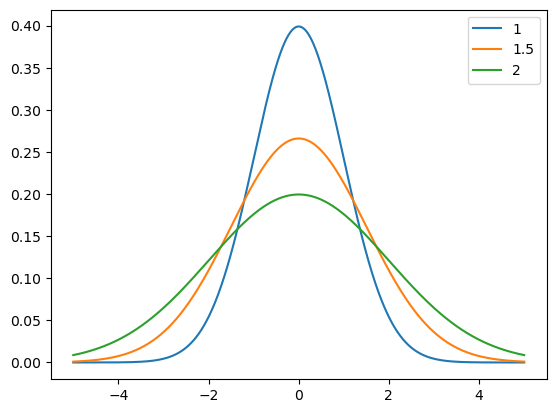

In [2]:
def gaussian1D(x, m, sd):
    """The gaussian function
    
    Parameters
    ----------
    input x: 1d array, m: mean, sd: standard deviation
    
    return y: the result of the gaussian function
        
    """  
    
    # (1) add your code here. 5 points
    #-----------------------

    a = 1 / (math.sqrt(2 * math.pi * (sd**2)))
    
    e = math.e
    y = a * e**(-(((x-m)**2) / (2 * (sd**2))))
    
    return y
    
    #---------------------------------
    
x = np.linspace(-5, 5, 1000)
sd1, sd2, sd3 = 1, 1.5,  2
m = 0
g1, g2, g3 = gaussian1D(x, m, sd1), gaussian1D(x, m, sd2), gaussian1D(x, m, sd3)

plt.plot(x, g1, label = '1')
plt.plot(x, g2, label = '1.5')
plt.plot(x, g3, label = '2')
plt.legend()

C:\Users\a_j_p\AppData\Local\Temp\ipykernel_1820\772791257.py:44: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(cs)


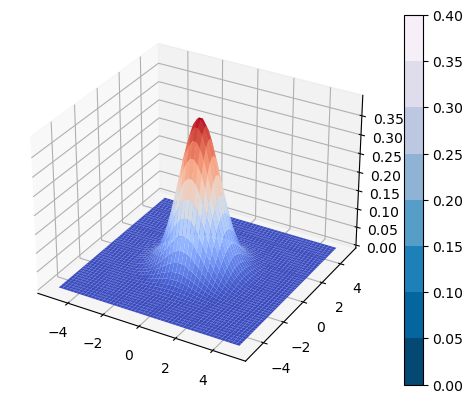

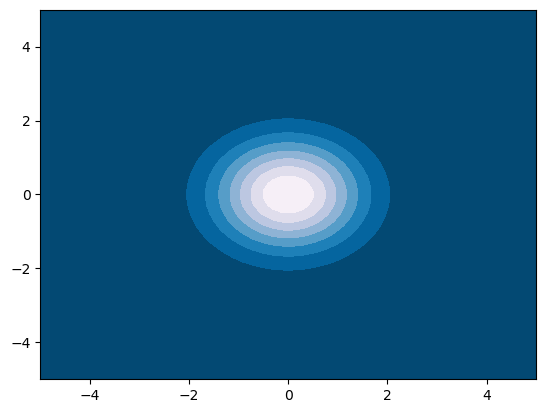

In [7]:
from matplotlib import cm

def gaussian2D(x, y, m1, m2, sd1, sd2):
    """The 2D gaussian function: A Exp(-0.5 * ((x1-m1)/sd1)**2 + ((x2-m2)/sd2)**2)
    
    Parameters
    ----------
    input x: 1D array of the 1st dimension, y: 1D array of the 2nd dimension, m1, m2, sd1, sd2
    
    return z: the result of the gaussian function
        
    """  
    
    # (2) add your code here. 10 points
    #-----------------------

    A = 1 / (math.sqrt(2 * math.pi * (sd1**2) * (sd2**2)))
    
    e = math.e
    z = A * e**(-0.5 * ((((x - m1)**2) / (sd1**2)) + (((y - m2)**2) / (sd2**2))))
    
    return z

    #---------------------------------
    
x1 = np.linspace(-5, 5)
x2 = np.linspace(-5, 5)
x, y = np.meshgrid(x1, x2) # get 2D variables instead of 1D
                  
m1 = 0
m2 = 0
sd1 = 1 
sd2 = 1
    
# show 3D    
#print(z.shape) 
z = gaussian2D(x, y, m1, m2, sd1, sd2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, cmap=cm.coolwarm)

# SHOW 2D curves
fig1, ax1 = plt.subplots()
cs = ax1.contourf(x, y, z, cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)

### Sigmoid functions. 15 points

In [12]:
def sigm(x):
    """The logistic sigmoid function
    
    Parameters
    ----------
    input x: 1D numpy arrays
    
    return y: the result of the sigmoid function
        
    """  
    
    # (3) add your code here. 5 points
    #sigm should be able to deal with scalars and vectors
    #-----------------------
    
    # set upper and lower limits on the range of x to solve 
    # overflow because it yields practically the same result
    #x = np.clip(x, -687.5, 687.5)
    
    y = np.where(x < 0, (1 / (1 + np.exp(-np.abs(x)))), (1 / (1 + np.exp(-x)))) 
    # can use this way to achieve more precise values
    
    return y
    
    #---------------------------------

def dsigm(x):
    """The derivative of the logistic sigmoid function
    
    Parameters
    ----------
    input x: 1D numpy arrays   
    
    return dy: the result of the derivative of the logistic sigmoid function
    
    """ 
    
    # (4) add your code here. 5 points
    #dsigm should be able to deal with scalars and vectors
    #-------------------------------

    # set upper and lower limits on the range of x to solve 
    # overflow because it yields practically the same result
    #x = np.clip(x, -687.5, 687.5)
    
    #dy = ((np.exp(-x)) / ((1 + np.exp(-x))**2))
    dy = sigm(x) * (1 - sigm(x))
    
    return dy
    
    #------------------------------
    
print('sigmoid(0):', sigm(0))
print('sigmoid(10^(6)):', sigm(1e6))
print('sigmoid(-10^(6)):', sigm(-1e6))

print('derivative of sigmoid(0):', dsigm(0))
print('derivative of sigmoid(10^(6)):', dsigm(1e6))
print('derivative of sigmoid(-10^(6)):', dsigm(-1e6))

# (5) add your code here. 5 points
# show the curves of the sigm and dsigm functions using plt.plot() function
# from -10 to 10
#-----------------------
x = np.arange(-10, 10, 0.01) # x axis
y = sigm(x)  #
y1 = dsigm(x)


#-----------------------

sigmoid(0): 0.5
sigmoid(10^(6)): 1.0
sigmoid(-10^(6)): 1.0
derivative of sigmoid(0): 0.25
derivative of sigmoid(10^(6)): 0.0
derivative of sigmoid(-10^(6)): 0.0


C:\Users\a_j_p\AppData\Local\Temp\ipykernel_1820\449952367.py:20: RuntimeWarning: overflow encountered in exp
  y = np.where(x < 0, (1 / (1 + np.exp(-np.abs(x)))), (1 / (1 + np.exp(-x))))


### Divergence. 10 points

In [5]:
# KL divergence.
def DKL(p, q):
    
    """KL divergence from distribution p to q 
    
    Parameters
    ----------
    p, q : 1D numpy arrays of discrete probability distributions
    
    """
    
    # (6) add your code here. 5 points
    #Avoid the division-by-zero problem in the logp/q
    #-----------------------
    
    p_nozeros = p[p != 0]
    q_nozeros = q[q != 0]
    
    #KL_divergence = np.sum(p_nozeros * np.log(p_nozeros / q_nozeros)) # equivalent derivation
    KL_divergence = -np.sum(p_nozeros * np.log(q_nozeros)) - (-np.sum(p_nozeros * np.log(p_nozeros)))
    
    return KL_divergence
    
    #-----------------------
    
#Jensen-Shannon divergence    
def DJS(p, q):
    
    """Jensen-Shannon divergence from distribution p to q 
    
    Parameters
    ----------
    p, q : 1D numpy arrays of discrete probability distributions
    
    """
    
    # (7) add your code here. 5 points
    #-----------------------  

    p_nozeros = p[p != 0]
    q_nozeros = q[q != 0]
    
    m = 0.5 * (p_nozeros + q_nozeros)
    m_nozeros = m[m != 0]
    
    Jensen_Shannon_divergence = (0.5 * DKL(p_nozeros, m_nozeros)) + (0.5 * DKL(q_nozeros, m_nozeros))
    
    return Jensen_Shannon_divergence
    
    #-----------------------
    
# test code
p = np.array([0.2, 0.8, 0])
q = np.array([0.1, 0.9, 0])

print('KL:', DKL(p, q), DKL(q, p))
print('JS:', DJS(p, q), DJS(q, p))

KL: 0.044403007586882315 0.036690014034750584
JS: 0.009966389341172721 0.009966389341172721


### Cross-entropy. 10 points

In [6]:
# Cross-entropy. 10 points
def crossentropy(p, q):
    """The Cross-entropy H(P, Q)
    
    Parameters
    ----------
    p, q : 1D numpy arrays of discrete probability distributions
    
    """  
    
    # (6) add your code here
    # students should take care of zeros in q 
    #-----------------------
    
    q_clip = q.clip(0.000000000001, 1) # done to take care of zeros in q so log is not negative infinity
    
    crossentropy = -np.sum(p * np.log(q_clip))
    return crossentropy

    #-----------------------
    
# test code
p = np.array([0.2, 0.7, 0.1, 0])
q = np.array([0.1, 0.9, 0, 0.1])
print(crossentropy(p, q), crossentropy(q, p))    

3.988147019050356 3.9358288802793377
